In [24]:
import os

print(os.listdir())          # tu dois voir 'data'
print(os.listdir("data"))    # tu dois voir le .gpkg


['Carte_Choroplèthe.ipynb', 'data', 'aloys_eda.ipynb', 'dept_specialite_wide.csv', 'dept_specialite_long.csv', 'dev_1.ipynb']
['ADE_4-0_GPKG_WGS84G_FRA-ED2025-10-15.gpkg']


In [26]:
import os
import pyogrio
import geopandas as gpd

gpkg_path = os.path.join("data", "ADE_4-0_GPKG_WGS84G_FRA-ED2025-10-15.gpkg")

layers = pyogrio.list_layers(gpkg_path)
print("Couches disponibles :")
print(layers)


Couches disponibles :
[['canton' 'MultiPolygon']
 ['arrondissement' 'MultiPolygon']
 ['arrondissement_municipal' 'MultiPolygon']
 ['chef_lieu_d_arrondissement' 'Point']
 ['chef_lieu_d_arrondissement_municipal' 'Point']
 ['chef_lieu_de_canton' 'Point']
 ['chef_lieu_de_collectivite_territoriale' 'Point']
 ['chef_lieu_de_commune' 'Point']
 ['chef_lieu_de_commune_associee_ou_deleguee' 'Point']
 ['chef_lieu_de_departement' 'Point']
 ['chef_lieu_d_epci' 'Point']
 ['chef_lieu_de_region' 'Point']
 ['collectivite_territoriale' 'MultiPolygon']
 ['commune' 'MultiPolygon']
 ['commune_associee_ou_deleguee' 'MultiPolygon']
 ['departement' 'MultiPolygon']
 ['epci' 'MultiPolygon']
 ['region' 'MultiPolygon']
 ['info_metadonnees' None]
 ['layer_styles' None]]


/home/dic97/.pyenv/versions/3.11.8/envs/Artefact/lib/python3.11/site-packages/pyogrio/core.py:130: RuntimeWarning: Field format 'character varying' not supported
  return ogr_list_layers(get_vsi_path_or_buffer(path_or_buffer))
/home/dic97/.pyenv/versions/3.11.8/envs/Artefact/lib/python3.11/site-packages/pyogrio/core.py:130: RuntimeWarning: Field format 'character varying(256)' not supported
  return ogr_list_layers(get_vsi_path_or_buffer(path_or_buffer))
/home/dic97/.pyenv/versions/3.11.8/envs/Artefact/lib/python3.11/site-packages/pyogrio/core.py:130: RuntimeWarning: Field format 'character varying(30)' not supported
  return ogr_list_layers(get_vsi_path_or_buffer(path_or_buffer))
/home/dic97/.pyenv/versions/3.11.8/envs/Artefact/lib/python3.11/site-packages/pyogrio/core.py:130: RuntimeWarning: Field format 'timestamp with time zone' not supported
  return ogr_list_layers(get_vsi_path_or_buffer(path_or_buffer))


In [27]:
dept_layer = "DEPARTEMENT"   # adapte selon ton print

gdf_dep = gpd.read_file(gpkg_path, layer=dept_layer)


In [28]:
print(gdf_dep.columns.tolist())
print(gdf_dep.head())


['cleabs', 'nom_officiel', 'nom_officiel_en_majuscules', 'code_insee', 'code_insee_de_la_region', 'code_siren', 'geometry']
                     cleabs       nom_officiel nom_officiel_en_majuscules  \
0  DEPARTEM0000000000000007            Ardèche                    ARDECHE   
1  DEPARTEM0000000000000063        Puy-de-Dôme                PUY-DE-DOME   
2  DEPARTEM0000000000000076     Seine-Maritime             SEINE-MARITIME   
3  DEPARTEM0000000000000017  Charente-Maritime          CHARENTE-MARITIME   
4  DEPARTEM0000000000000075              Paris                      PARIS   

  code_insee code_insee_de_la_region code_siren  \
0         07                      84  220700017   
1         63                      84  226300010   
2         76                      28  227605409   
3         17                      75  221700016   
4         75                      11  227500055   

                                            geometry  
0  MULTIPOLYGON (((4.44035 44.2836, 4.44024 44.28..

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Charger la table agrégée (pathologies)
agg = pd.read_csv("dept_specialite_long.csv")

# dept_code en string, avec padding (01, 02, ..., 75, 971...)
agg["dept_code"] = agg["dept_code"].astype(str).str.zfill(2)

# 2) Créer dept_code côté GeoDataFrame
gdf_dep["dept_code"] = gdf_dep["code_insee"].astype(str).str.zfill(2)

# Contrôle rapide
print(agg[["dept_code"]].drop_duplicates().sort_values("dept_code").head())
print(gdf_dep[["dept_code"]].drop_duplicates().sort_values("dept_code").head())


   dept_code
0         01
11        02
22        03
33        04
44        05
   dept_code
24        01
58        02
80        03
16        04
33        05


In [30]:
def build_map_for_specialite(specialite):
    # Filtrer la spécialité dans ta table longue
    data_spec = agg[agg["specialite"] == specialite].copy()

    # Jointure tabulaire sur dept_code
    gdf = gdf_dep.merge(data_spec, on="dept_code", how="left")

    # Remplacer NaN par 0 (départements sans données pour cette spécialité)
    gdf["charge_pathologique"] = gdf["charge_pathologique"].fillna(0)

    # Tracé choroplèthe
    fig, ax = plt.subplots(figsize=(8, 9))
    gdf.plot(
        column="charge_pathologique",
        ax=ax,
        legend=True,
        edgecolor="black",
        linewidth=0.3
    )
    ax.set_axis_off()
    ax.set_title(f"Charge pathologique – {specialite}", fontsize=12)
    plt.tight_layout()
    plt.show()


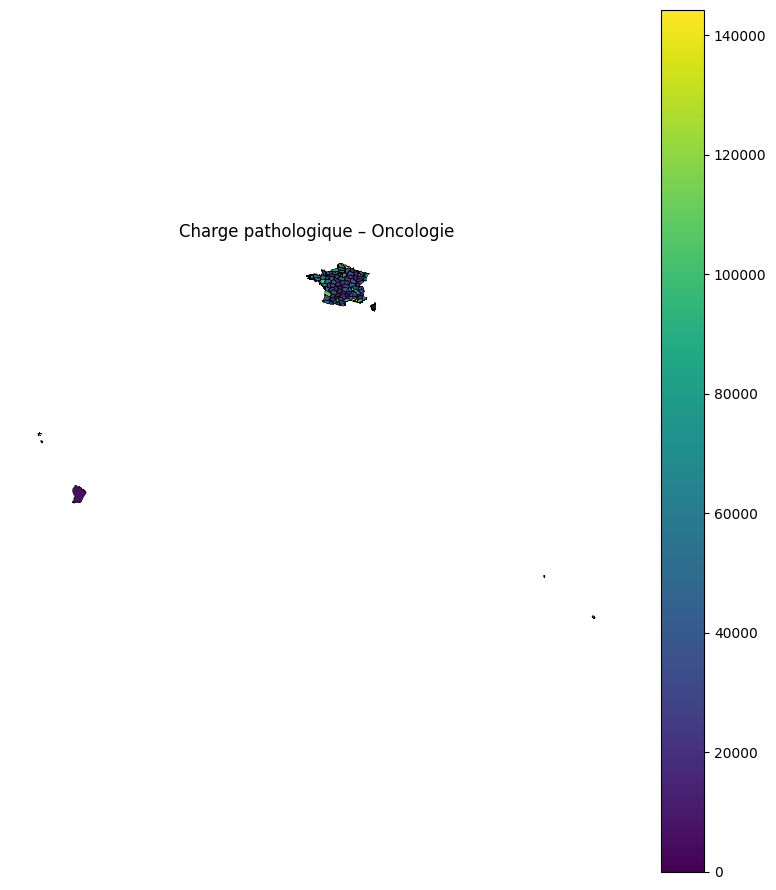

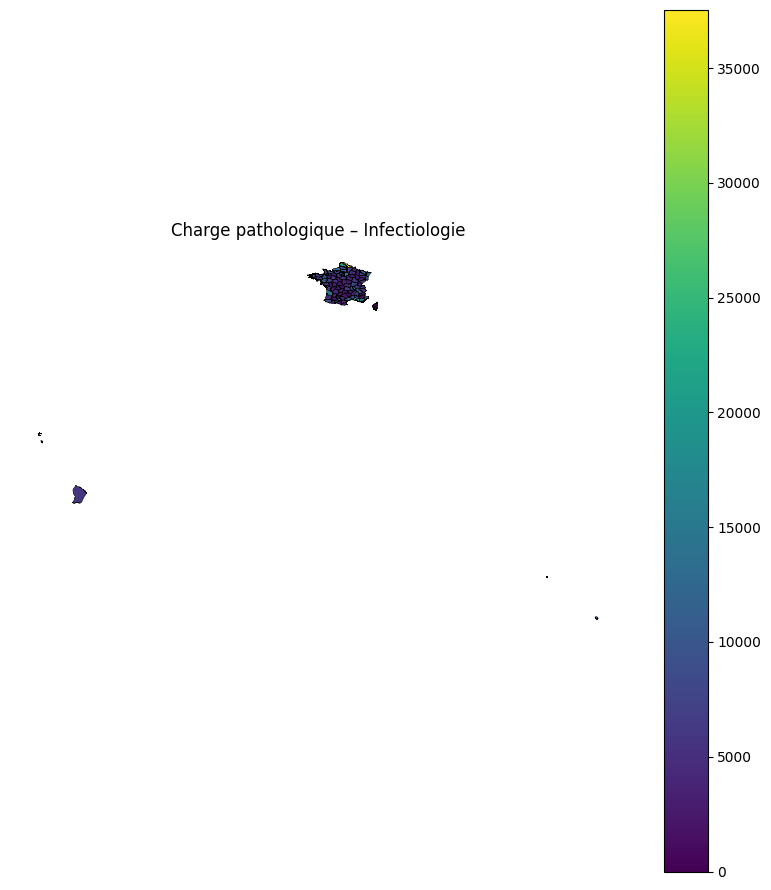

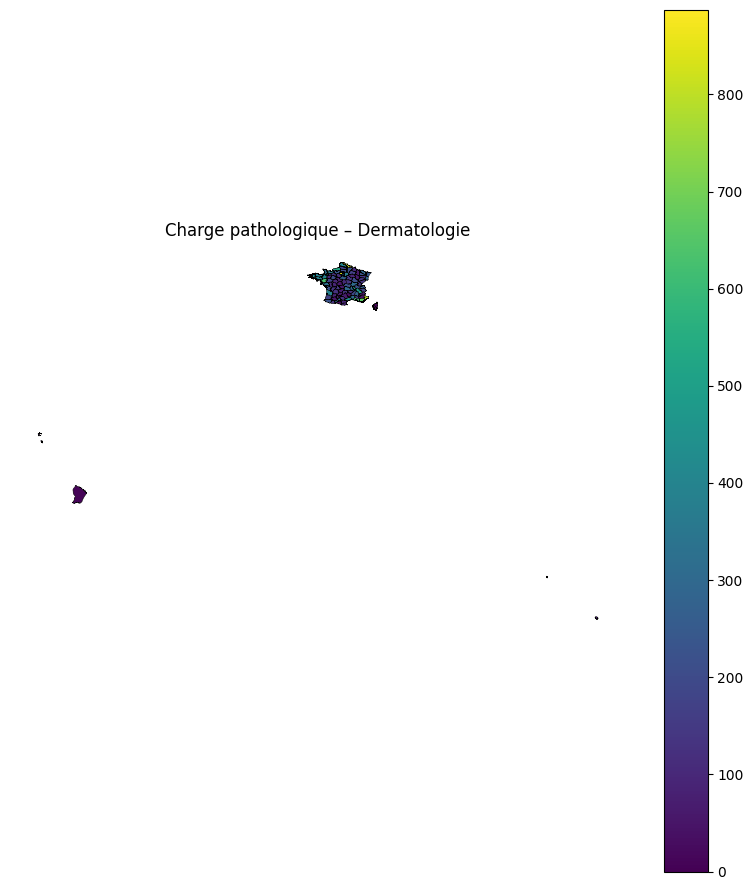

In [31]:
build_map_for_specialite("Oncologie")
build_map_for_specialite("Infectiologie")
build_map_for_specialite("Dermatologie")
